In [6]:
import pandas as pd
import seaborn as sns
%matplotlib inline

df = pd.read_csv('norm_firth_rlog1418_combat.csv', sep=',', index_col=0)
# Drop Duplicated Indexes
df = df[~df.index.duplicated(keep='first')]
#use only a subset
subset_df = df.head(25)
smidge = 1e-14
# create dfs for contrl and HD
ctrl_df = subset_df.loc[:, subset_df.columns.str.startswith('C_')]
HD_df = subset_df.loc[:, subset_df.columns.str.startswith('H_')]

#Get column names for each
HD_columns = HD_df.columns
ctrl_columns = ctrl_df.columns
ctrl_df
# #divide each
for cols in HD_columns:
    HD_sum = HD_df[cols].sum()
    HD_df[cols] = (HD_df[cols]+smidge)/HD_sum
HD_prob_df = HD_df

for cols in ctrl_columns:
    ctrl_sum = ctrl_df[cols].sum()
    ctrl_df[cols] = (ctrl_df[cols]+smidge)/ctrl_sum
ctrl_prob_df = ctrl_df


/home/rhapsody/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rhapsody/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


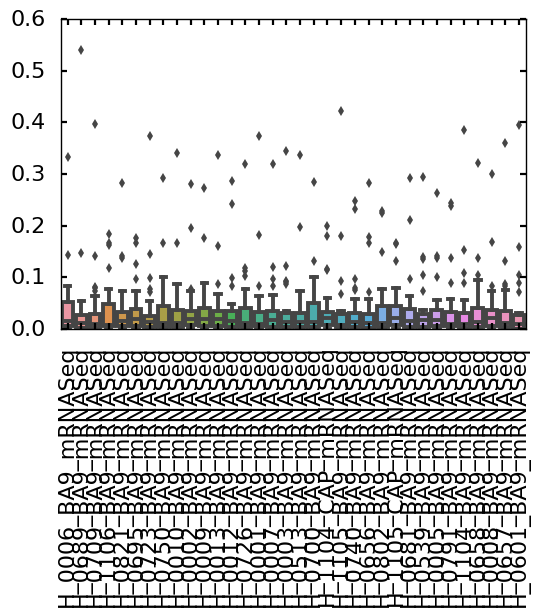

In [7]:
labels =HD_prob_df.columns
sns.set_context("poster")
h = sns.boxplot(orient='v',data=HD_prob_df)
h.set_xticklabels(rotation=90,labels=labels)


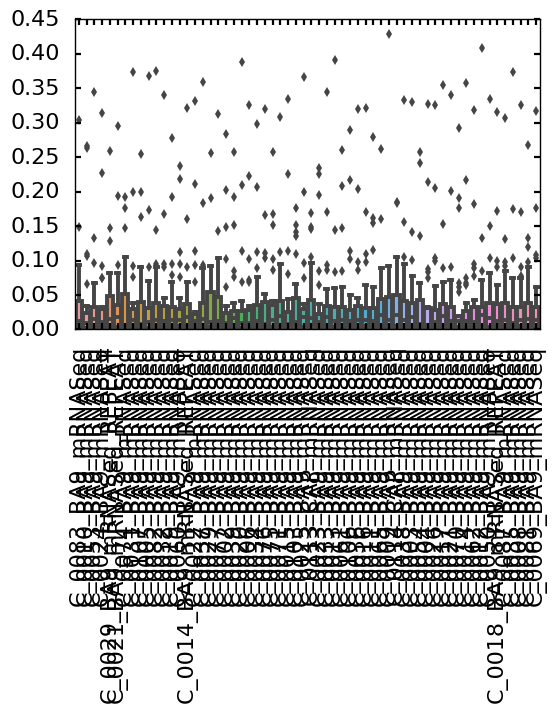

In [8]:
labels =ctrl_prob_df.columns
sns.set_context("poster")
c = sns.boxplot(orient='v',data=ctrl_prob_df)
c.set_xticklabels(rotation=90,labels=labels)


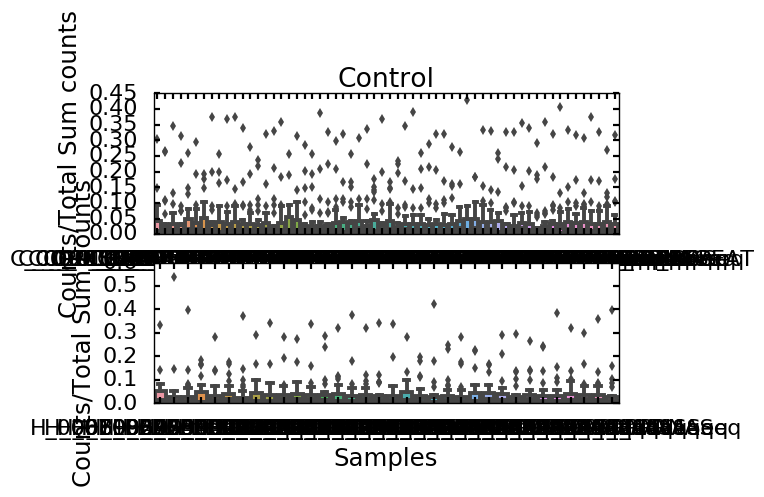

In [9]:
import matplotlib as plt
f, (ax1, ax2) = plt.pyplot.subplots(2)
c_labels =ctrl_prob_df.columns
sns.set_context("poster")
c = sns.boxplot(orient='v',data=ctrl_prob_df, ax=ax1)
#c.set_xticklabels(rotation=90,labels=c_labels)
ax1.set_title('Control')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Counts/Total Sum counts')


H_labels =HD_prob_df.columns
sns.set_context("poster")
H = sns.boxplot(orient='v',data=HD_prob_df, ax=ax2)
#H.set_xticklabels(rotation=90,labels=H_labels)

ax2.set_xlabel('Samples')
ax2.set_ylabel('Counts/Total Sum counts')
# H.set_xlabel('xlabel')
# H.set_ylabel('ylabel')
#plt.pyplot.tight_layout()

plt.pyplot.savefig('ControlvsHDdistribution.png')

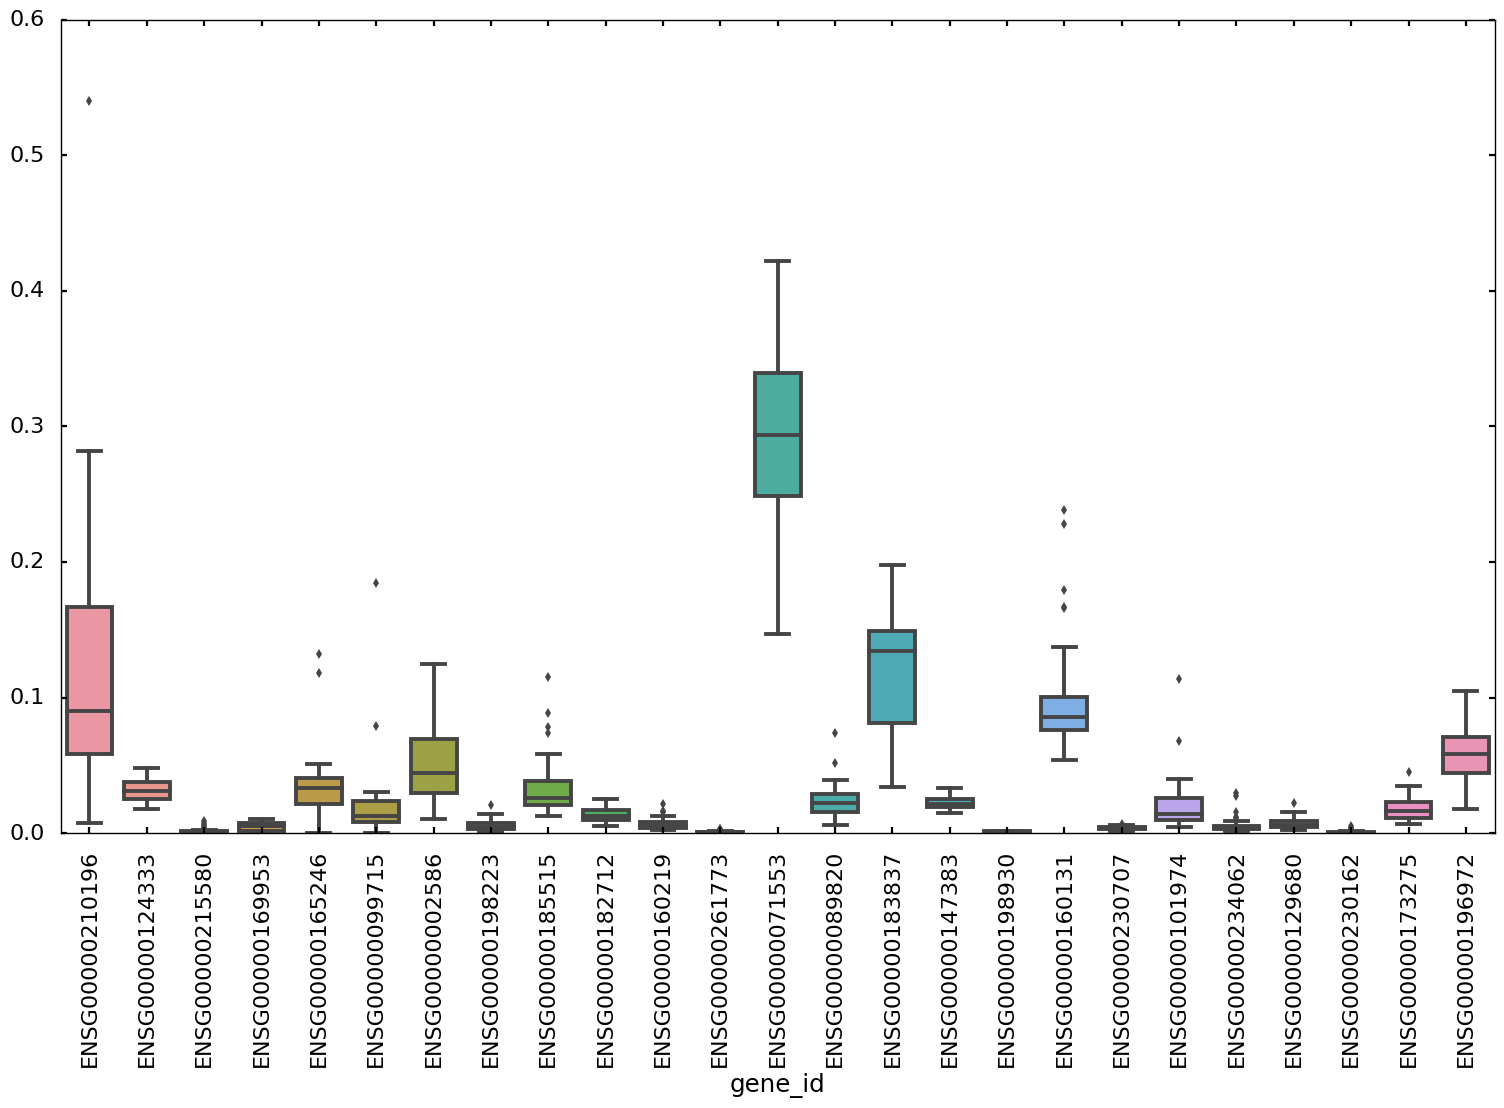

In [19]:
import matplotlib as plt
prob_labels =HD_prob_df.index
sns.set_context("poster")
ph = sns.boxplot(orient='v',data=HD_prob_df.T)
ph.set_xticklabels(rotation=90,labels=prob_labels)
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('HD.png', dpi=100)


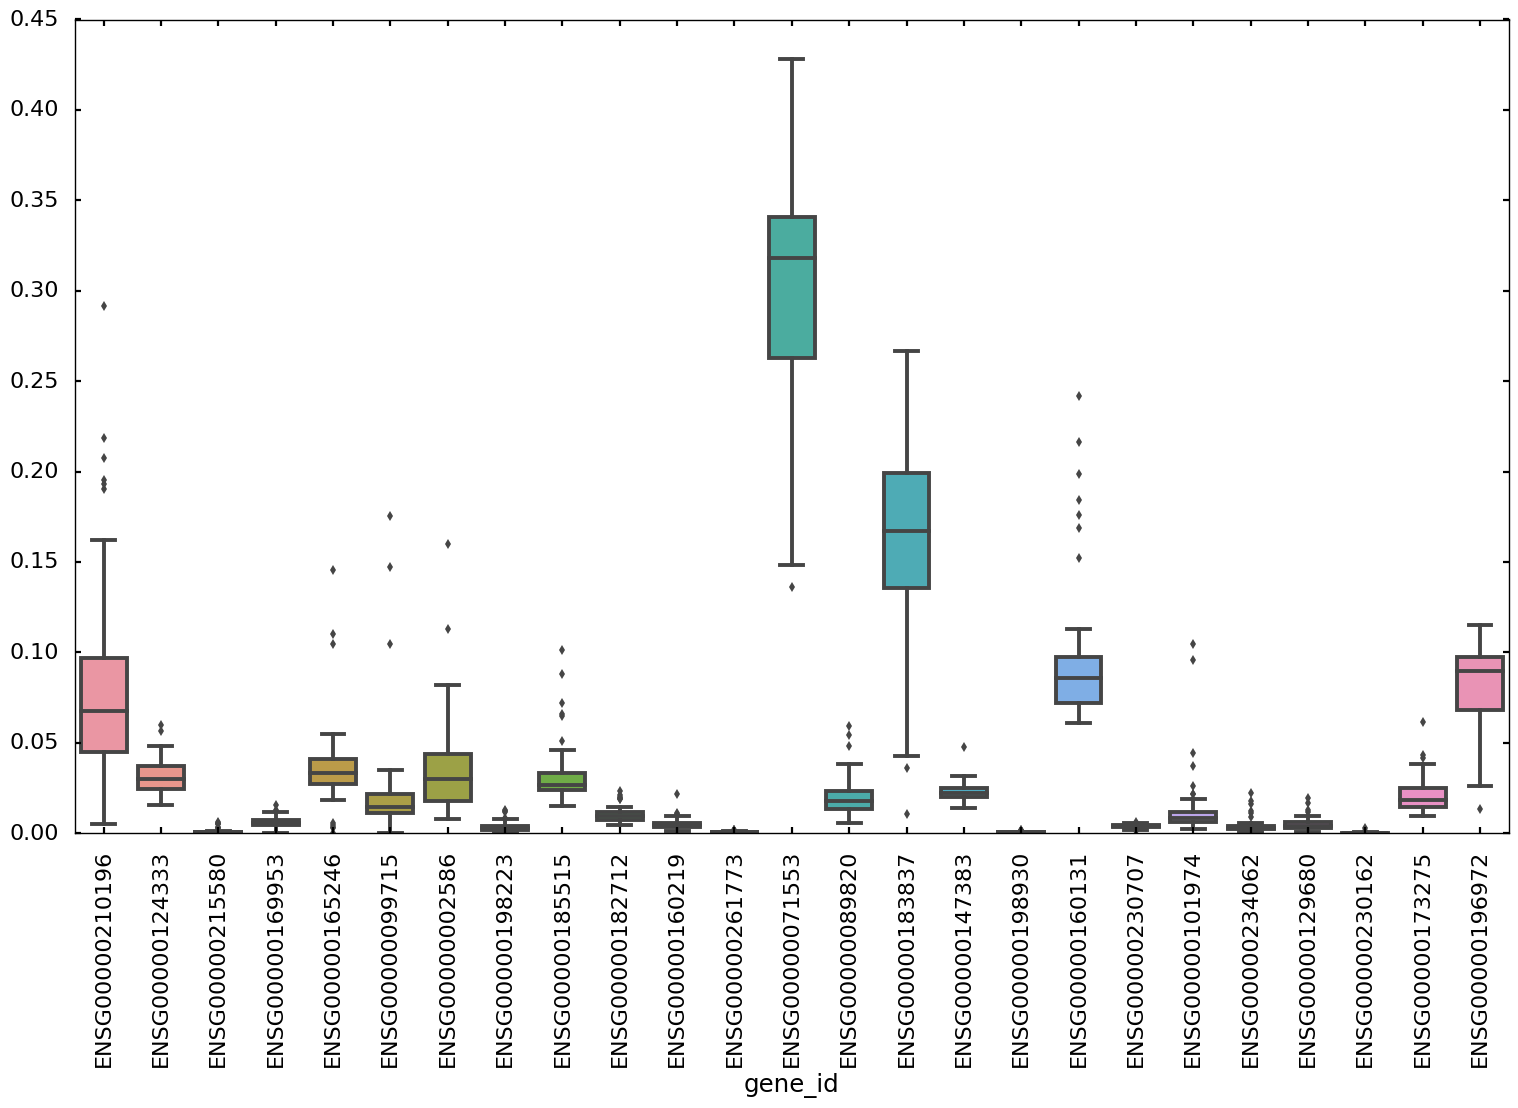

In [20]:
ctrl_prob_labels =ctrl_prob_df.index
sns.set_context("poster")
ch = sns.boxplot(orient='v',data=ctrl_prob_df.T)
ch.set_xticklabels(rotation=90,labels=ctrl_prob_labels)
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Ctrl.png', dpi=100)



In [12]:
bar = HD_prob_df.median(axis=1).to_frame()
bar.rename(columns= {0: 'H_probabilities'})
foo = ctrl_prob_df.median(axis=1).to_frame()
foo.rename(columns= {0: 'C_probabilities'})
bar
#ctrl_med = pd.DataFrame(ctrl_prob_df.median(axis=1),columns=['gene_id', 'probabilities'])
#ctrl_med


0
gene_id                  
ENSG00000210196  0.089794
ENSG00000124333  0.030924
ENSG00000215580  0.000777
ENSG00000169953  0.005288
ENSG00000165246  0.033727
ENSG00000099715  0.012486
ENSG00000002586  0.044516
ENSG00000198223  0.004372
ENSG00000185515  0.026003
ENSG00000182712  0.012444
ENSG00000160219  0.005434
ENSG00000261773  0.000692
ENSG00000071553  0.293783
ENSG00000089820  0.022054
ENSG00000183837  0.134663
ENSG00000147383  0.021553
ENSG00000198930  0.000791
ENSG00000160131  0.085628
ENSG00000230707  0.003646
ENSG00000101974  0.014047
ENSG00000234062  0.004021
ENSG00000129680  0.005935
ENSG00000230162  0.000384
ENSG00000173275  0.016147
ENSG00000196972  0.058232

In [13]:
HD_prob_df.T

gene_id             ENSG00000210196  ENSG00000124333  ENSG00000215580  \
H_0006_BA9_mRNASeq         0.078401         0.021474         0.000354   
H_0689_BA9_mRNASeq         0.540088         0.027218         0.000486   
H_0709_BA9_mRNASeq         0.081538         0.017650         0.001012   
H_1106_BA9_mRNASeq         0.007597         0.048133         0.003753   
H_0821_BA9_mRNASeq         0.008803         0.030953         0.005624   
H_0695_BA9_mRNASeq         0.176849         0.038699         0.001104   
H_0723_BA9_mRNASeq         0.054235         0.021371         0.000583   
H_0750_BA9_mRNASeq         0.166640         0.030895         0.000469   
H_0010_BA9_mRNASeq         0.056607         0.036929         0.000388   
H_0002_BA9_mRNASeq         0.281556         0.030692         0.002156   
H_0009_BA9_mRNASeq         0.176351         0.032274         0.001677   
H_0013_BA9_mRNASeq         0.063139         0.034240         0.000469   
H_0012_BA9_mRNASeq         0.242343         0.027389         0.000755   
H_0726_BA9_mRNASeq         0.102536         0.040428         0.000461   
H_0001_BA9_mRNASeq         0.063722         0.022794         0.000593   
H_0007_BA9_mRNASeq         0.066853         0.035422         0.001208   
H_0003_BA9_mRNASeq         0.091477         0.025854         0.002314   
H_0513_BA9_mRNASeq         0.072053         0.021515         0.000501   
H_0700_BA9_mRNASeq         0.099905         0.033316         0.000451   
H_1104_CAP_mRNASeq         0.012284         0.043184         0.009130   
H_1105_BA9_mRNASeq         0.035699         0.019833         0.000243   
H_0740_BA9_mRNASeq         0.248573         0.022005         0.000799   
H_0656_BA9_mRNASeq         0.166272         0.024810         0.001002   
H_0802_BA9_mRNASeq         0.009393         0.047784         0.005940   
H_1105_CAP_mRNASeq         0.011197         0.043378         0.003843   
H_0681_BA9_mRNASeq         0.210712         0.043870         0.001143   
H_0539_BA9_mRNASeq         0.135172         0.025510         0.000251   
H_0005_BA9_mRNASeq         0.140506         0.037632         0.000852   
H_0791_BA9_mRNASeq         0.008865         0.044843         0.007235   
H_1104_BA9_mRNASeq         0.108396         0.026232         0.000145   
H_0658_BA9_mRNASeq         0.094673         0.038168         0.000439   
H_0008_BA9_mRNASeq         0.168054         0.029065         0.001287   
H_0657_BA9_mRNASeq         0.088112         0.018898         0.000028   
H_0601_BA9_mRNASeq         0.071618         0.031146         0.000370   

gene_id             ENSG00000169953  ENSG00000165246  ENSG00000099715  \
H_0006_BA9_mRNASeq     6.234445e-03     2.351464e-02     1.465115e-02   
H_0689_BA9_mRNASeq     4.289305e-19     4.289305e-19     4.289305e-19   
H_0709_BA9_mRNASeq     5.532342e-04     2.933884e-02     1.000336e-02   
H_1106_BA9_mRNASeq     6.298616e-03     1.179017e-01     1.845713e-01   
H_0821_BA9_mRNASeq     6.021455e-11     5.288769e-03     5.752525e-03   
H_0695_BA9_mRNASeq     6.596407e-03     3.123385e-02     7.025004e-03   
H_0723_BA9_mRNASeq     1.082045e-03     2.487162e-02     1.218476e-02   
H_0750_BA9_mRNASeq     3.658356e-03     4.649474e-02     9.440379e-03   
H_0010_BA9_mRNASeq     9.720683e-03     3.916963e-02     2.435184e-02   
H_0002_BA9_mRNASeq     7.315919e-03     4.439997e-02     1.024555e-02   
H_0009_BA9_mRNASeq     4.225988e-03     4.112701e-02     2.477833e-02   
H_0013_BA9_mRNASeq     8.113875e-03     3.322936e-02     2.370178e-02   
H_0012_BA9_mRNASeq     8.026569e-03     3.424457e-02     1.657129e-02   
H_0726_BA9_mRNASeq     6.834806e-03     4.505832e-02     2.425518e-02   
H_0001_BA9_mRNASeq     9.190255e-03     2.444400e-02     1.064945e-02   
H_0007_BA9_mRNASeq     7.675724e-03     3.495611e-02     1.865622e-02   
H_0003_BA9_mRNASeq     3.176739e-03     3.494471e-02     9.584204e-03   
H_0513_BA9_mRNASeq     8.186042e-03     2.453866e-02     1.451615e-02   
H_0700_BA9_mRNASeq     4.206822e-03     5.072045e-02     

In [14]:
ctrl_prob_df.T['ENSG00000210196'].median()

0.06737669990627693

In [15]:
HD_prob_df.T['ENSG00000210196'].median()

0.08979424558591691

In [16]:
import numpy as np
P_hunt = np.divide(5, 100000)
P_not_hunt = 1-P_hunt
like_hunt = HD_prob_df.median(axis=1).tolist()
like_ctrl = ctrl_prob_df.median(axis=1).tolist()
result_p = np.prod(np.array(like_hunt))*P_hunt
result_c = np.prod(np.array(like_ctrl))*P_not_hunt
print(result_p, result_c)
#min HD value is 1.352075e-11
#smidge 1e-14

3.19236876604e-53 1.16543647512e-50


In [17]:
first_H = HD_prob_df["H_0006_BA9_mRNASeq"].tolist()
result_1 = np.prod(np.array(first_H))*P_hunt
result_2 = np.prod(np.array(first_H))*P_not_hunt
if result_1 < result_2:
    print("Class= Huntington's")
else:
    print("Class= Control")

Class= Huntington's


In [15]:
import pandas as pd
df = pd.read_csv('norm_firth_rlog1418_combat.csv', sep=',', index_col=0)
# Drop Duplicated Indexes
df = df[~df.index.duplicated(keep='first')]
#use only a subset
subset_df = df.head(25)
smidge = 1e-14
# create dfs for contrl and HD
ctrl_df = subset_df.loc[:, subset_df.columns.str.startswith('C_')]
HD_df = subset_df.loc[:, subset_df.columns.str.startswith('H_')]
cols = ctrl_df.columns
ctrl_df[cols[0:4]]

C_0083_BA9_mRNASeq  C_0010_BA9_mRNASeq  C_0053_BA9_mRNASeq  \
gene_id                                                                       
ENSG00000210196         1597.379141         2434.129231         1145.736248   
ENSG00000124333          833.059592          375.664191          572.834025   
ENSG00000215580            6.323780            4.121589            9.041428   
ENSG00000169953          151.181611          173.212107          110.722110   
ENSG00000165246          982.267497          546.977942          610.343247   
ENSG00000099715          605.230598          324.268346          270.003318   
ENSG00000002586          612.669540          776.462090         1105.247600   
ENSG00000198223           23.086732           29.320409          120.257551   
ENSG00000185515          699.020978          432.587097          482.232203   
ENSG00000182712          238.635214          188.789211          270.559136   
ENSG00000160219           51.845546           41.009786          117.216320   
ENSG00000261773            6.257221           14.551860           21.312058   
ENSG00000071553         6170.996527         5993.606676         6307.815112   
ENSG00000089820          182.822590          435.202463          491.549835   
ENSG00000183837         3025.813314         6077.385700         2423.607258   
ENSG00000147383          493.426573          366.442281          559.654648   
ENSG00000198930            2.681666            9.260274           30.689364   
ENSG00000160131         1911.214531         1499.582354         1779.957526   
ENSG00000230707           70.617209           70.113505           66.919863   
ENSG00000101974          196.656412          111.123291          238.695052   
ENSG00000234062           38.607858          102.471549           67.164951   
ENSG00000129680           49.362770           54.481236           76.355563   
ENSG00000230162            3.575555            1.322896            9.377306   
ENSG00000173275          513.986013          222.246582          186.267389   
ENSG00000196972         1846.934993         2482.070994         1241.077872   

                 C_0024_BA9_mRNASeq  
gene_id                              
ENSG00000210196         1642.049415  
ENSG00000124333          546.178984  
ENSG00000215580           15.339327  
ENSG00000169953          148.391003  
ENSG00000165246          715.774052  
ENSG00000099715          229.380650  
ENSG00000002586          659.051455  
ENSG00000198223           46.371040  
ENSG00000185515          531.061013  
ENSG00000182712          141.004801  
ENSG00000160219           72.496663  
ENSG00000261773            6.041389  
ENSG00000071553         6914.490052  
ENSG00000089820          341.442366  
ENSG00000183837         5016.769073  
ENSG00000147383          453.104143  
ENSG00000198930            8.457944  
ENSG00000160131         1658.723647  
ENSG00000230707          109.953272  
ENSG00000101974          123.244327  
ENSG00000234062           68.048388  
ENSG00000129680           84.845624  
ENSG00000230162            0.000000  
ENSG00000173275          476.061420  
ENSG00000196972         2017.316308